In [76]:
import pandas as pd
import ast
import numpy as np

import math
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
import matplotlib as mpl
import random


pdList = []
for instance in ['A', 'B', 'C', 'D']:
    for initial in ['Heuristic', 'Random']:
        df_i = pd.read_csv(f"/content/{initial}_TSP{instance}_out.csv")
        df_i.drop('Unnamed: 0', axis=1, inplace=True)
        df_i['initial'] = initial
        print(len(df_i))
        pdList.append(df_i)
df = pd.concat(pdList)

800
800
800
800
800
800
800
800


In [82]:

MAX_DIST = 2147483647
def get_plot_values(nodes : Dict[int, Tuple[int, int, int]], solution: List[int], costs: List[int]) -> Tuple[List[int], List[int], List[int], List[int], List[int]]:
    x_coords = [nodes[node][0] for node in list(nodes.keys())]
    y_coords = [nodes[node][1] for node in list(nodes.keys())]
    solution = solution.strip("[]")
    solution = [int(x) for x in solution.split()]
    solution = solution + [solution[0]]
    path_x_coords = [nodes[node][0] for node in solution]
    path_y_coords = [nodes[node][1] for node in solution]
    new_costs = [(cost/max(costs))*100 for cost in costs]
    min_cost, max_cost = min(costs), max(costs)
    power = 2
    normalized_costs = [((cost - min_cost) / (max_cost - min_cost)) ** power for cost in costs]
    colors = plt.cm.RdBu(normalized_costs)
    return x_coords, y_coords, new_costs, path_x_coords, path_y_coords, colors

def calculate_distance(nodes, node1, node2) -> int:
    x1, y1, _ = nodes[node1]
    x2, y2, _ = nodes[node2]
    return round(math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2))

def create_distance_matrix(nodes) -> np.ndarray:
    D = np.zeros(shape=(len(nodes), len(nodes)), dtype=np.int32)
    np.fill_diagonal(D, MAX_DIST)
    for node_index_1 in range(len(nodes) - 1):
        for node_index_2 in range(node_index_1 + 1, len(nodes)):
            distance = calculate_distance(nodes, node_index_1, node_index_2)
            D[node_index_1, node_index_2] = distance
            D[node_index_2, node_index_1] = distance
    return D

def plot_path(path, nodes, costs, title):
    x_coords, y_coords, new_costs, path_x_coords, path_y_coords, colors = get_plot_values(nodes, path, costs)
    plt.scatter(x_coords, y_coords, color=colors, marker='o', s=new_costs, label='Cities')
    plt.plot(path_x_coords, path_y_coords, linestyle='-', marker='o', markersize=0, color='blue', label='Path', alpha = 0.7)
    plt.title(title)
    plt.show()

def read_data(filename='TSPA.csv', PATH='./'):
    df = pd.read_csv(PATH + filename, names=["x", "y", "cost"], sep=';', header=None)
    nodes = {}
    costs = []
    for idx, row in enumerate(df.values):
        x, y, cost = map(int, row)
        costs.append(cost)
        nodes[idx] = (x, y, cost)
    costs = [nodes[node][2] for node in list(nodes.keys())]
    D = create_distance_matrix(nodes)
    return nodes, costs, D

In [83]:
len(df)

6400

In [84]:
df

,Filename,Version,Intra_Type,Path,Initial_score,Score,Time,initial
0,TSPA.csv,steepest,nodes,[149 50 43 77 4 114 121 91 161 76 145 ...,75628,75416,0.372435,Heuristic
1,TSPA.csv,steepest,nodes,[ 1 130 152 11 48 106 26 8 124 80 14 1...,76575,76265,0.526449,Heuristic
2,TSPA.csv,steepest,nodes,[ 2 114 91 121 50 149 0 76 55 117 21 1...,76202,76192,0.209127,Heuristic
3,TSPA.csv,steepest,nodes,[ 40 164 178 19 0 149 50 43 77 4 114 1...,76443,75416,0.551671,Heuristic
4,TSPA.csv,steepest,nodes,[ 4 77 43 35 19 178 164 40 128 36 132 ...,75842,75832,0.216430,Heuristic
...,...,...,...,...,...,...,...,...
795,TSPD.csv,greedy,edges,[159 147 181 189 47 185 132 18 81 73 61 1...,213926,48361,5.102479,Random
796,TSPD.csv,greedy,edges,[ 88 55 4 153 157 145 79 136 61 10 73 ...,207691,49846,4.872354,Random
797,TSPD.csv,greedy,edges,[ 70 91 156 3 78 45 67 158 162 150 117 ...,213011,49144,4.505074,Random
798,TSPD.csv,greedy,edges,[ 52 65 18 16 14 8 63 115 82 53 142 1...,214650,50198,4.384973,Random


In [85]:
grouped = df.groupby(['Filename', 'Version', 'Intra_Type', 'initial'])
results = []

# Perform analysis on each group
for (filename, version, intra_type, initial), group_df in grouped:
    num_rows = len(group_df)

    mean_score = group_df['Score'].mean()
    max_score = group_df['Score'].max()
    min_score = group_df['Score'].min()

    mean_improvement = (group_df['Initial_score'] - group_df['Score']).mean()
    min_improvement = (group_df['Initial_score'] - group_df['Score']).min()
    max_improvement = (group_df['Initial_score'] - group_df['Score']).max()

    idx_smallest_score = group_df['Score'].idxmin()
    path_smallest_score = group_df.loc[idx_smallest_score, 'Path']

    mean_time = group_df['Time'].mean()
    min_time = group_df['Time'].min()
    max_time = group_df['Time'].max()

    results.append([filename, version, intra_type, initial, num_rows, mean_score, max_score, min_score, mean_improvement, min_improvement, max_improvement, mean_time, min_time, max_time, path_smallest_score])

headers = ["Filename", "Version", "Intra_Type", "Initial", "Number of Iterations", "Mean Score", "Max Score", "Min Score", "Mean Improvement", "Min Improvement", "Max Improvement", "Mean Time", "Min Time", "Max Time", "Path"]
results_df = pd.DataFrame(results, columns=headers)

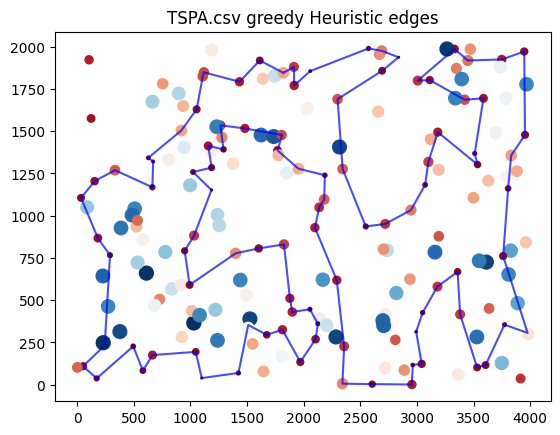

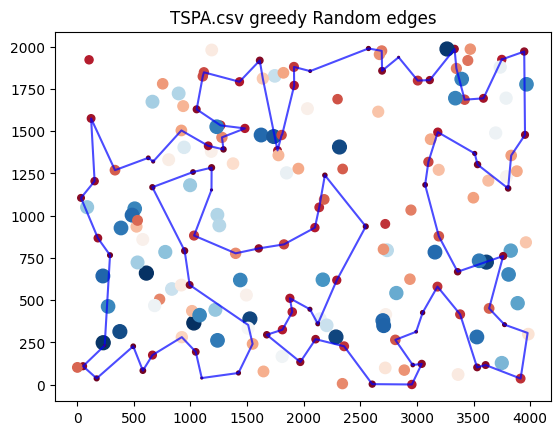

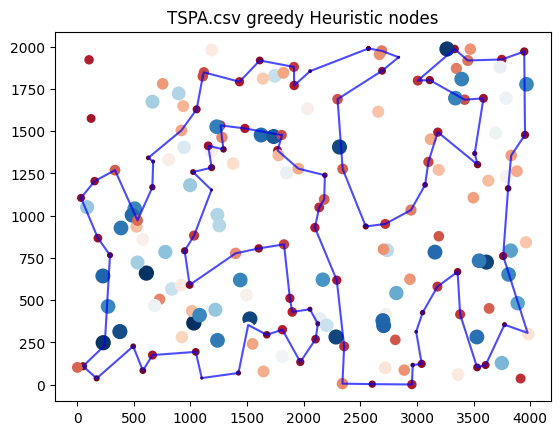

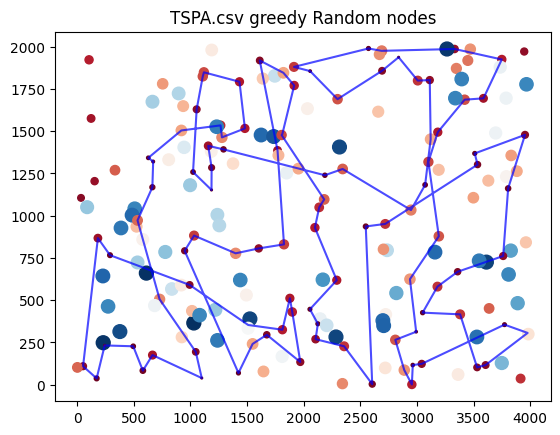

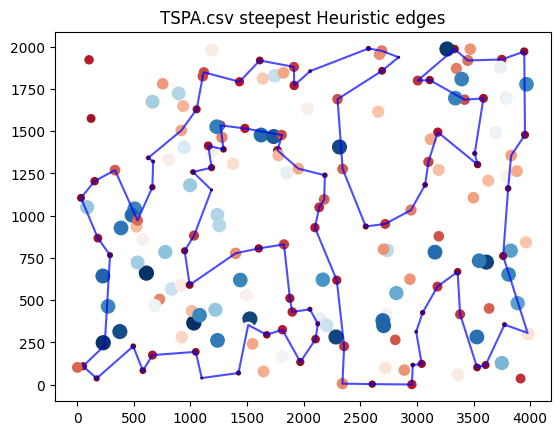

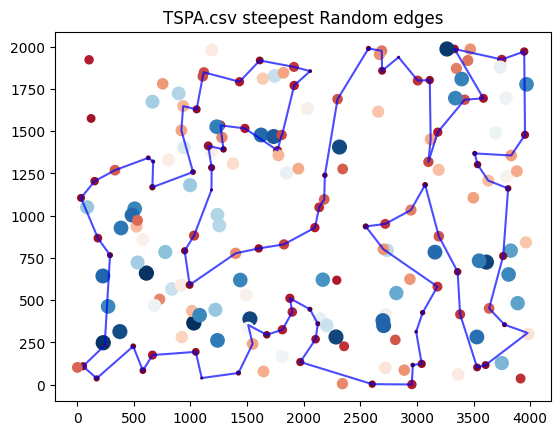

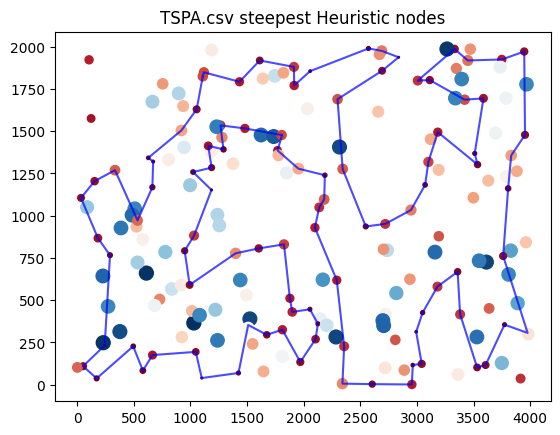

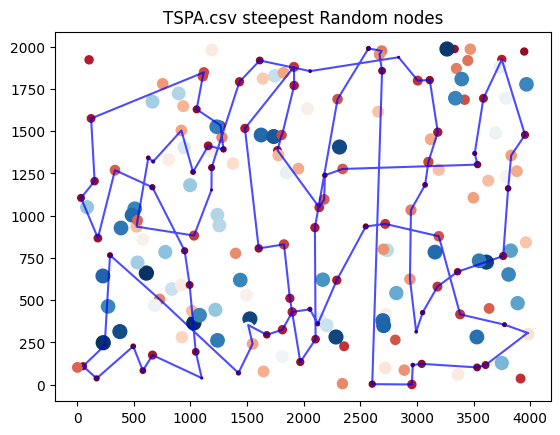

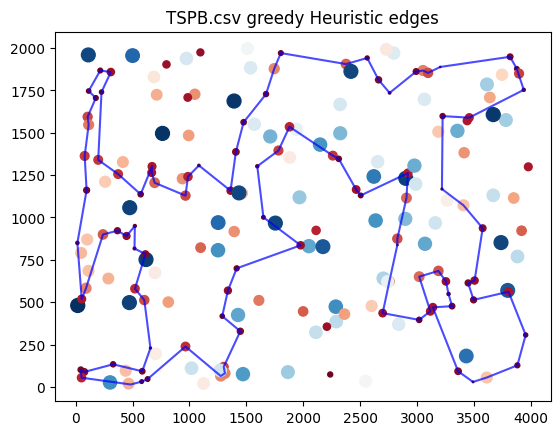

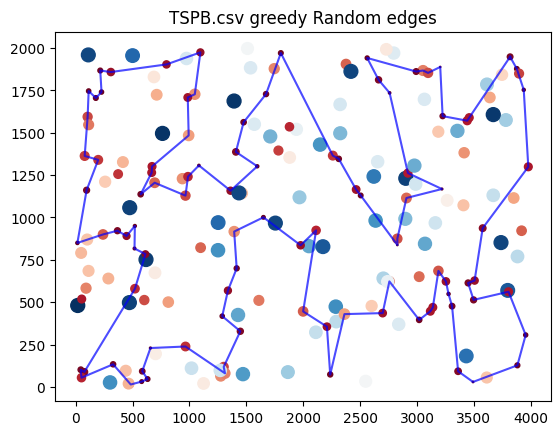

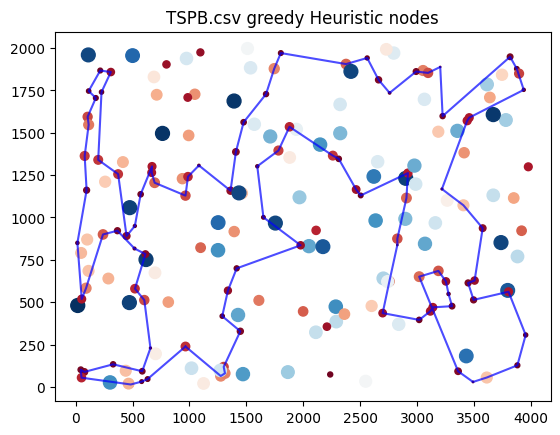

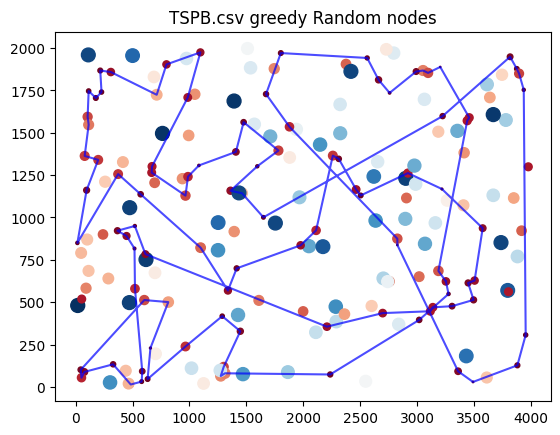

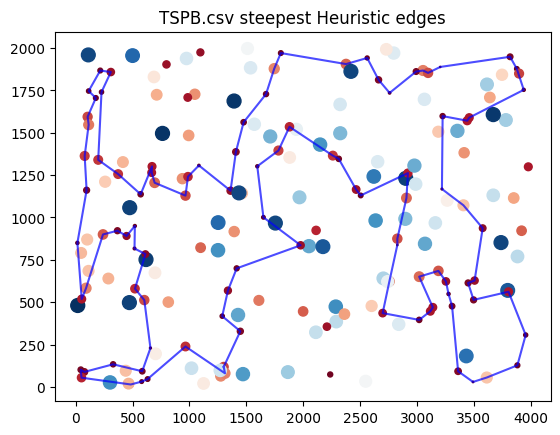

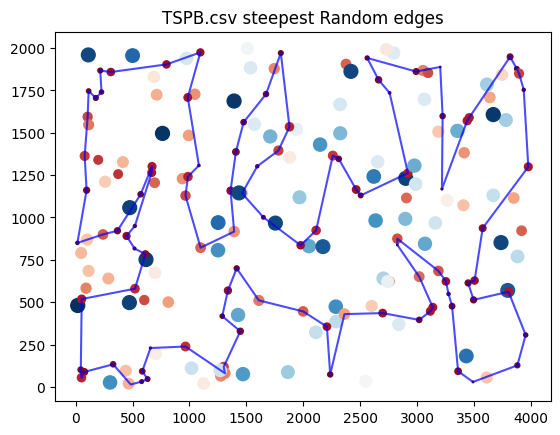

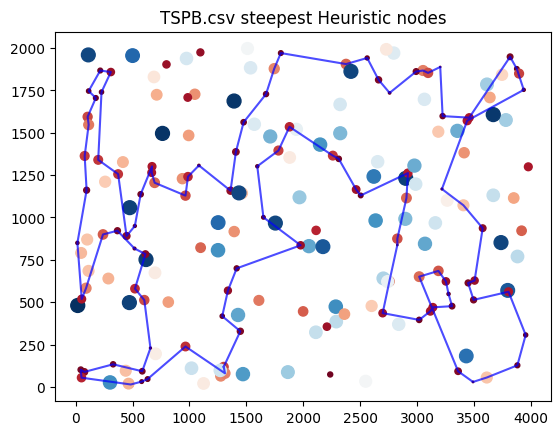

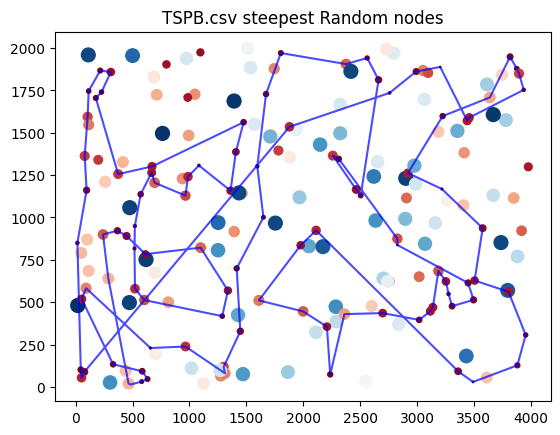

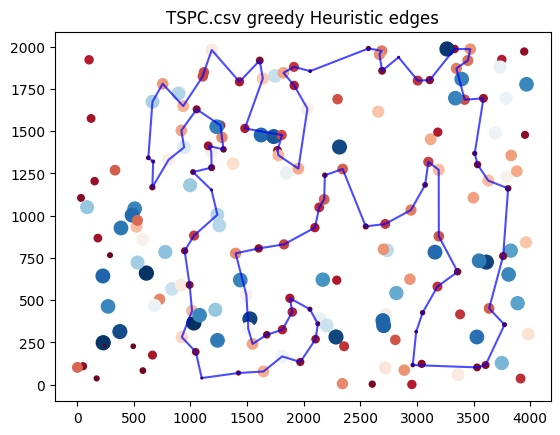

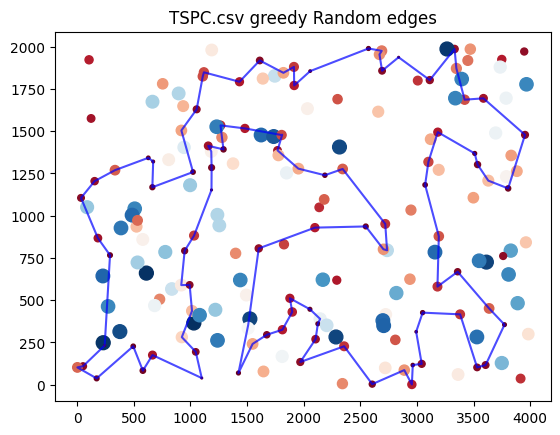

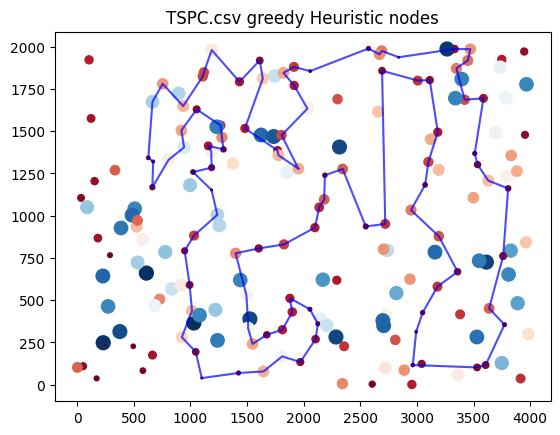

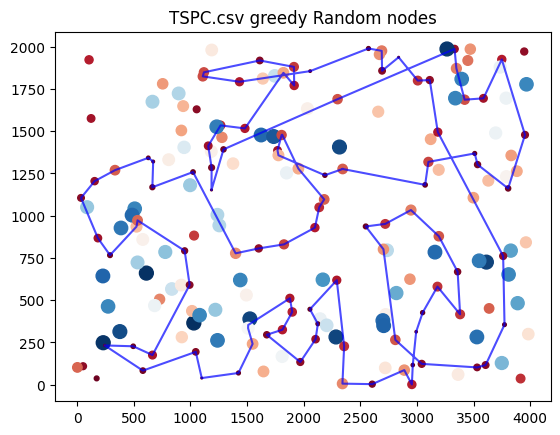

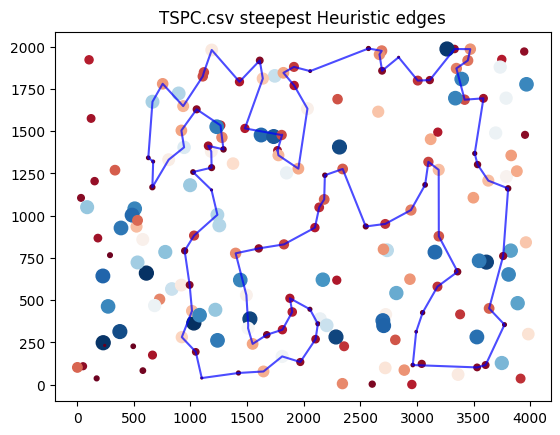

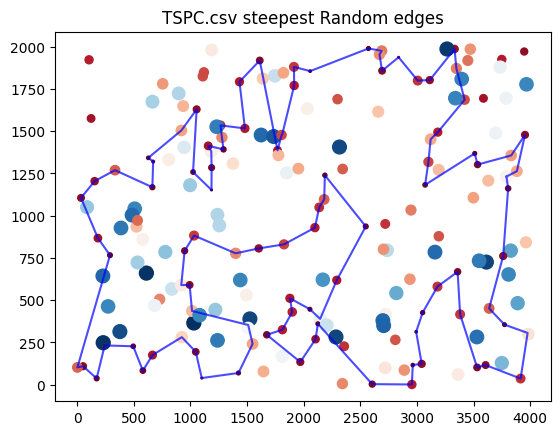

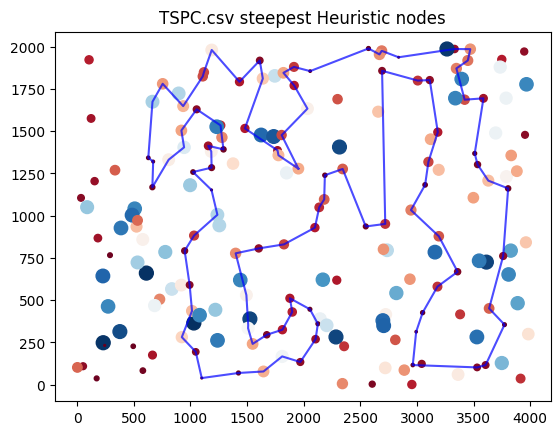

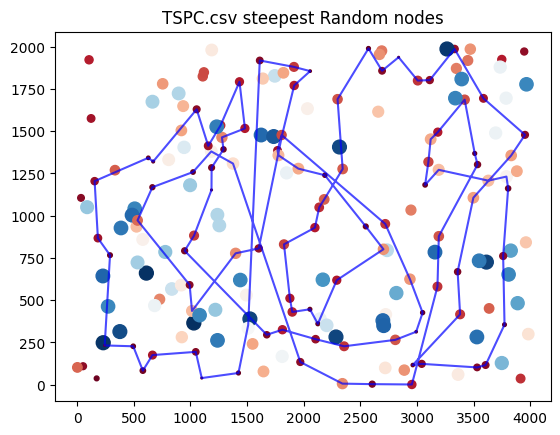

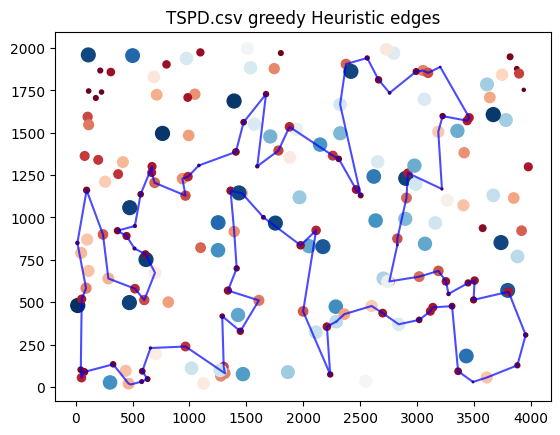

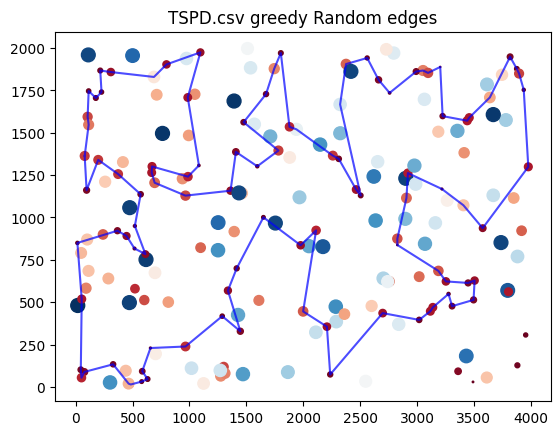

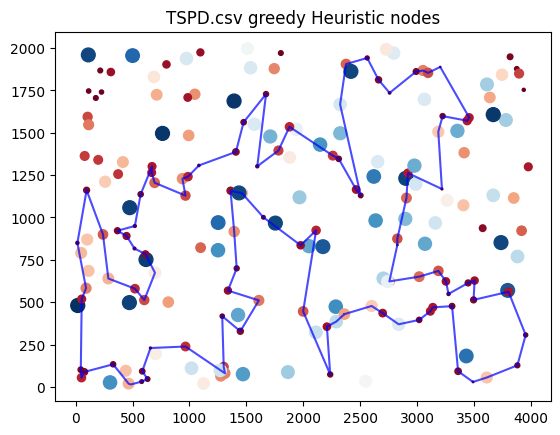

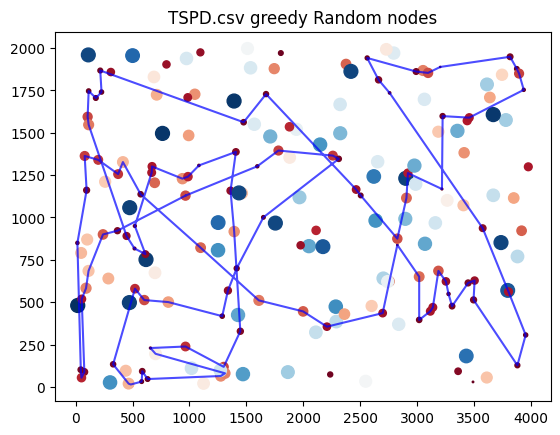

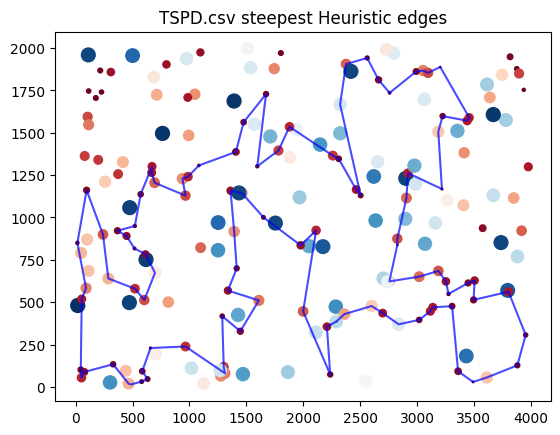

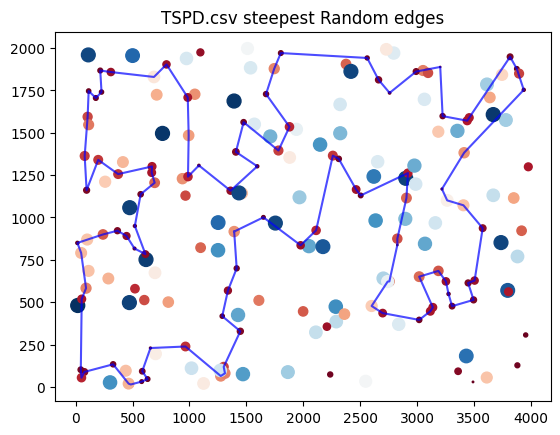

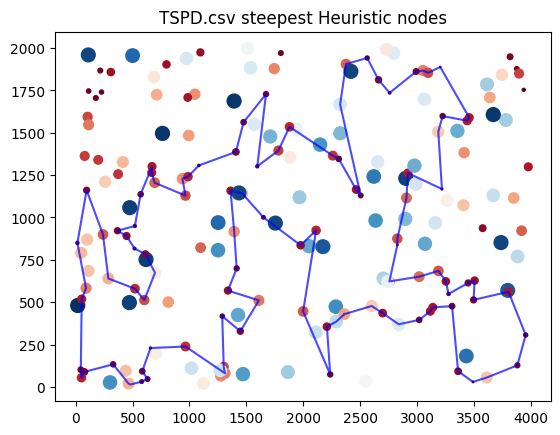

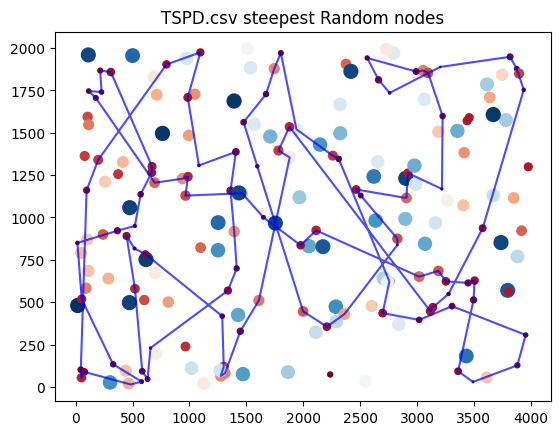

In [88]:
from IPython.display import display

# display(results_df)
paths = results_df['Path']
f_names = results_df['Filename']
titles = results_df["Filename"] + " " + results_df["Version"] +" " +  results_df["Initial"] +" " +results_df['Intra_Type']
paths.head()
f_names

for idx, path in enumerate(paths.tolist()):
    nodes, costs, D = read_data(PATH='./', filename=f_names[idx])
    plot_path(path, nodes, costs, titles[idx])
    # print(path)

# for path in paths:
#     print(path)

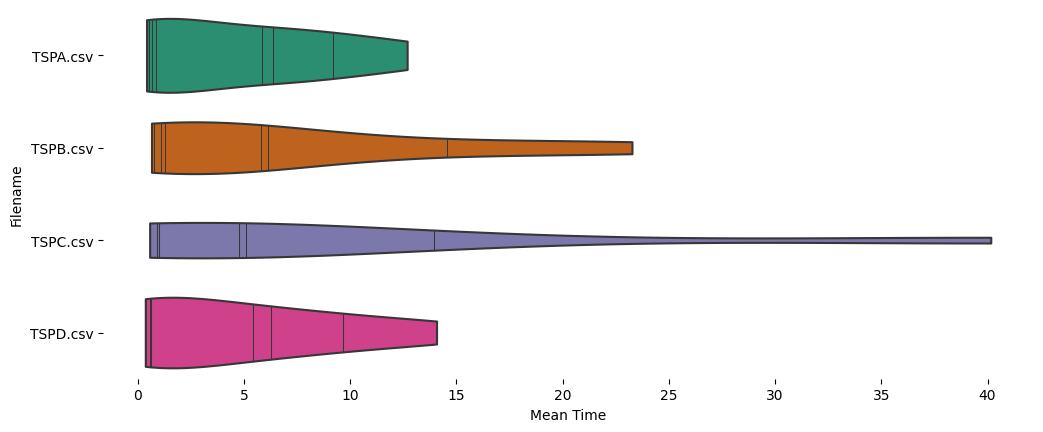

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Filename'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Mean Time', y='Filename', inner='stick', palette='Dark2', cut=0)
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Version'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Mean Time', y='Version', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(results_df['Version'].unique()))
plt.figure(figsize=figsize)

# Specify the correct DataFrame and column names for x and y
ax = sns.violinplot(data=results_df, x='Mean Time', y='Version', inner='stick', palette='Dark2')

# Set the x-axis limit to start from a value greater than the minimum in your data
x_min = results_df['Mean Time'].min()
ax.set_xlim(left=max(0, x_min - 10))  # You can adjust the -10 to an appropriate margin value

sns.despine(top=True, right=True, bottom=True, left=True)

plt.show()


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Version'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Mean Time', y='Version', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)